In [4]:
import random
import metaworld
import numpy as np

print(metaworld.ML1.ENV_NAMES)  # Check out the available environments

ml1 = metaworld.ML1('pick-place-v2') # Construct the benchmark, sampling tasks

env = ml1.train_classes['pick-place-v2'](render_mode='rgb_array')  # Create an environment with task `pick_place`
task = random.choice(ml1.train_tasks)
env.set_task(task)  # Set task

obs = env.reset()  # Reset environment
a = env.action_space.sample()  # Sample an action
obs, reward, trunc, term, info = env.step(a)  # Step the environment with the sampled random action

['assembly-v2', 'basketball-v2', 'bin-picking-v2', 'box-close-v2', 'button-press-topdown-v2', 'button-press-topdown-wall-v2', 'button-press-v2', 'button-press-wall-v2', 'coffee-button-v2', 'coffee-pull-v2', 'coffee-push-v2', 'dial-turn-v2', 'disassemble-v2', 'door-close-v2', 'door-lock-v2', 'door-open-v2', 'door-unlock-v2', 'hand-insert-v2', 'drawer-close-v2', 'drawer-open-v2', 'faucet-open-v2', 'faucet-close-v2', 'hammer-v2', 'handle-press-side-v2', 'handle-press-v2', 'handle-pull-side-v2', 'handle-pull-v2', 'lever-pull-v2', 'peg-insert-side-v2', 'pick-place-wall-v2', 'pick-out-of-hole-v2', 'reach-v2', 'push-back-v2', 'push-v2', 'pick-place-v2', 'plate-slide-v2', 'plate-slide-side-v2', 'plate-slide-back-v2', 'plate-slide-back-side-v2', 'peg-unplug-side-v2', 'soccer-v2', 'stick-push-v2', 'stick-pull-v2', 'push-wall-v2', 'reach-wall-v2', 'shelf-place-v2', 'sweep-into-v2', 'sweep-v2', 'window-open-v2', 'window-close-v2']


(-0.5, 479.5, 479.5, -0.5)

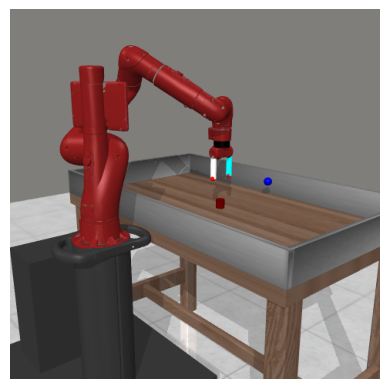

In [8]:
import matplotlib.pyplot as plt
from gymnasium.envs.mujoco.mujoco_rendering import MujocoRenderer
import numpy as np

DEFAULT_CAMERA_CONFIG = {
    "distance": 1.5,
    "azimuth": 500,
    "elevation": -15.0,
    "lookat": np.array([0.3, 0.2, 0.2]),
}
env.mujoco_renderer = MujocoRenderer(env.model, env.data, DEFAULT_CAMERA_CONFIG)

plt.imshow(env.render())
plt.axis('off')

In [4]:
import h5py

with h5py.File("/home/m_bobrin/CrossDomainIL_mine/prep_data/metaworld/window_open/window-open-v2.hdf5", "r") as f:
    observations = np.array(f['observations'])
    actions = np.array(f['actions'])
    goals = np.array(f['infos/goal'])
    dones = np.array(f['timeouts'])

/home/m_bobrin/Metaworld/metaworld/policies/policy.py:42: UserWarning: Constant(s) may be too high. Environments clip response to [-1, 1]
  warnings.warn(


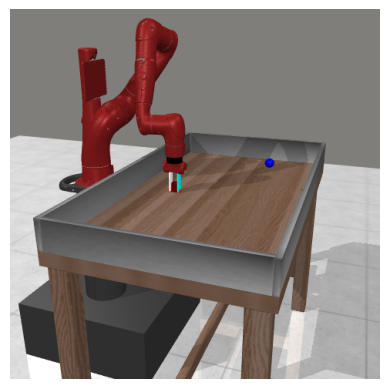

In [29]:
import metaworld.policies as policies

act = policies.SawyerPickPlaceV2Policy().get_action(obs)
obs, _, _, _, _ = env.step(act)
plt.imshow(env.render())
plt.axis('off')

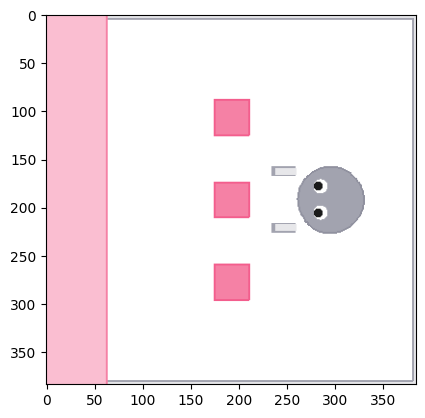

In [5]:
# NEED FIX or python=3.8
import gym
import xmagical
import matplotlib.pyplot as plt
xmagical.register_envs()

env = gym.make('SweepToTop-Gripper-State-Allo-Demo-v0')
env.reset()
plt.imshow(env.render(mode='rgb_array'))
